In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress  # Import linregress from scipy.stats

In [2]:

# Load the dataset
file_path = './EV_Data.csv'
ev_data = pd.read_csv(file_path)

ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Location,Unnamed: 17
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.300312,47.629782
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,PACIFICORP,5.307700e+10,-120.265813,46.406348
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,-122.201564,47.402358
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,PUGET SOUND ENERGY INC,5.306105e+10,-122.206146,47.839957
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,PACIFICORP,5.307700e+10,-120.611068,46.596645


In [3]:
# Count the total number of cars in the dataset
total_cars_count = ev_data.shape[0]

total_cars_count


191407

In [4]:
"There are 191,407 registered cars in this dataset."

'There are 191,407 registered cars in this dataset.'

In [5]:
# Count the number of cars for each make
make_counts = ev_data.groupby('Make').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Display the result
print(make_counts)

                    Make  Count
36                 TESLA  84670
7              CHEVROLET  14321
28                NISSAN  14239
12                  FORD  10048
19                   KIA   8671
5                    BMW   7993
38                TOYOTA   7181
39            VOLKSWAGEN   5408
18                  JEEP   4996
16               HYUNDAI   4977
32                RIVIAN   4751
40                 VOLVO   4469
2                   AUDI   3890
8               CHRYSLER   3393
25         MERCEDES-BENZ   1784
30               PORSCHE   1182
27            MITSUBISHI    996
26                  MINI    984
35                SUBARU    970
29              POLESTAR    939
15                 HONDA    857
10                  FIAT    781
9                  DODGE    619
24                 MAZDA    581
21                 LEXUS    567
6               CADILLAC    552
22               LINCOLN    281
23                 LUCID    263
34                 SMART    259
17                JAGUAR    234
13      

/var/folders/0h/qqmkr3rs5s72v4bnyvq7v1xr0000gn/T/ipykernel_65193/2415388788.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(make_counts))


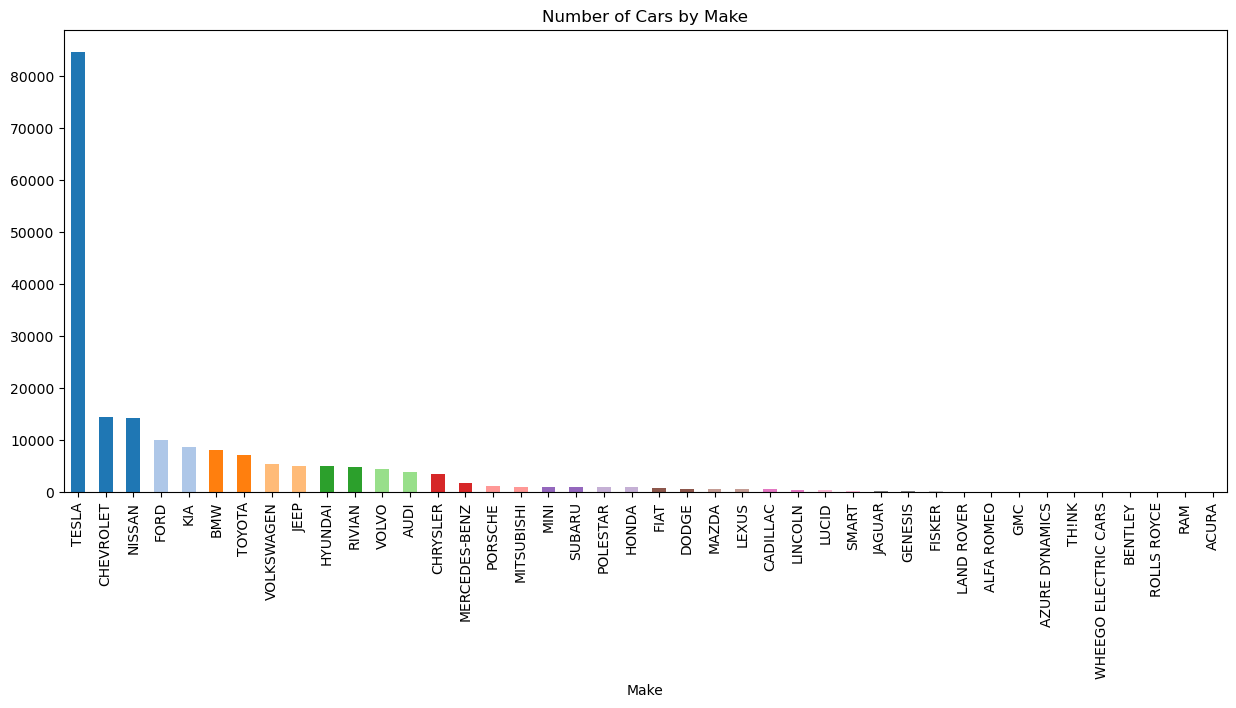

In [38]:
# Count the number of cars for each make
make_counts = ev_data['Make'].value_counts()

# Generate a color map with a different color for each bar
colors = plt.cm.get_cmap('tab20', len(make_counts))

# Create a bar chart with each bar a different color
plt.figure(figsize=(15, 6))
make_counts.plot(kind='bar', color=[colors(i) for i in range(len(make_counts))])
plt.title('Number of Cars by Make')
plt.ylabel('')  # Remove the default 'Number of Cars' label
plt.show()

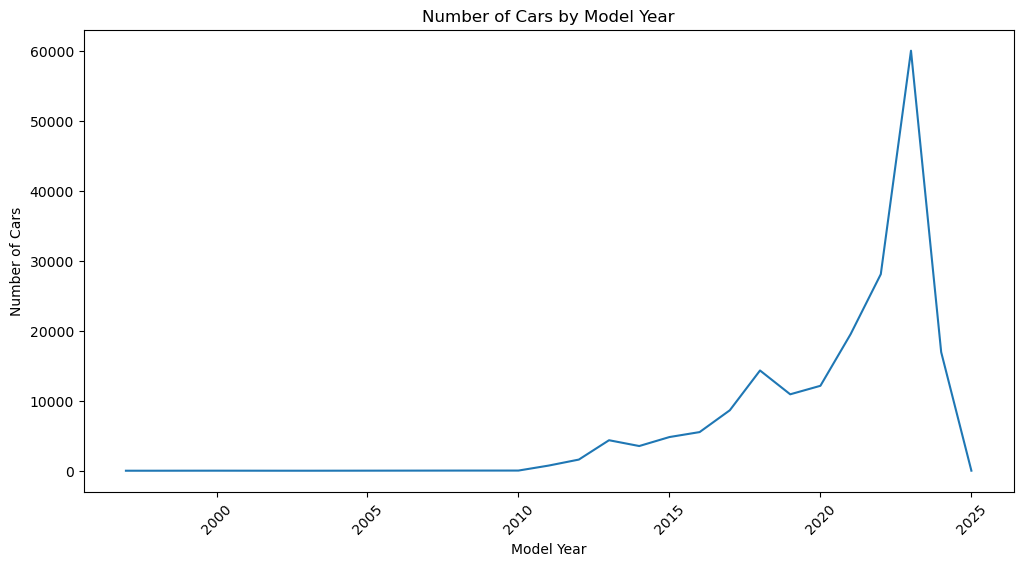

In [7]:

# Count the number of cars for each model year
model_year_counts = ev_data['Model Year'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='line')
plt.title('Number of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Count the number of Tesla cars in the dataset
tesla_count = ev_data.loc[ev_data['Make'] == 'TESLA'].shape[0]
print(f"Number of Tesla cars: {tesla_count}")

Number of Tesla cars: 84670


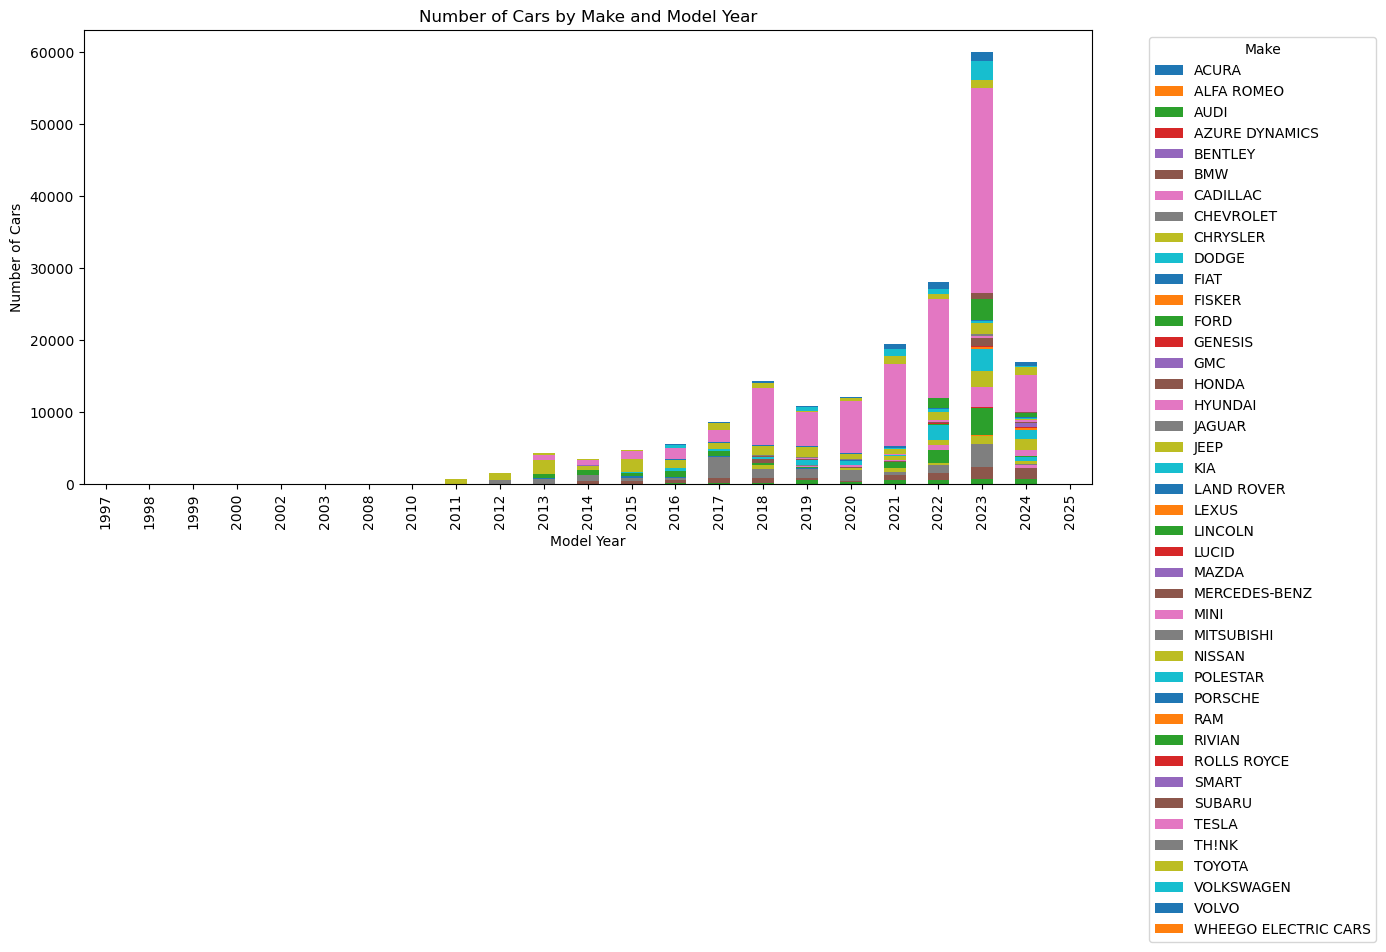

In [37]:
# Count the number of cars for each make and model year
make_model_year_counts = ev_data.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

# Create a stacked bar chart
ax = make_model_year_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of Cars by Make and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')

# Place the legend on the side of the graph
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
# Step 1: Group by 'Make' and 'Model Year' and count the number of cars
make_model_year_counts = ev_data.groupby(['Make']).size().reset_index(name='Count')

# Step 2: Remove rows where 'Make' is 'Tesla'
make_model_year_counts = make_model_year_counts.loc[make_model_year_counts['Make'] != 'TESLA']

# Step 3: Sort the data by 'Count' in descending order
make_model_year_counts_sorted = make_model_year_counts.sort_values(by='Count', ascending=False)

# Display the sorted data
print(make_model_year_counts_sorted.head(20))


             Make  Count
7       CHEVROLET  14321
28         NISSAN  14239
12           FORD  10048
19            KIA   8671
5             BMW   7993
38         TOYOTA   7181
39     VOLKSWAGEN   5408
18           JEEP   4996
16        HYUNDAI   4977
32         RIVIAN   4751
40          VOLVO   4469
2            AUDI   3890
8        CHRYSLER   3393
25  MERCEDES-BENZ   1784
30        PORSCHE   1182
27     MITSUBISHI    996
26           MINI    984
35         SUBARU    970
29       POLESTAR    939
15          HONDA    857


Make        ACURA  ALFA ROMEO  AUDI  AZURE DYNAMICS  BENTLEY  BMW  CADILLAC  \
Model Year                                                                    
1997          0.0         0.0   0.0             0.0      0.0  0.0       0.0   
1998          0.0         0.0   0.0             0.0      0.0  0.0       0.0   
1999          0.0         0.0   0.0             0.0      0.0  0.0       0.0   
2000          0.0         0.0   0.0             0.0      0.0  0.0       0.0   
2002          0.0         0.0   0.0             0.0      0.0  0.0       0.0   

Make        CHEVROLET  CHRYSLER  DODGE  ...  RAM  RIVIAN  ROLLS ROYCE  SMART  \
Model Year                              ...                                    
1997              1.0       0.0    0.0  ...  0.0     0.0          0.0    0.0   
1998              0.0       0.0    0.0  ...  0.0     0.0          0.0    0.0   
1999              0.0       0.0    0.0  ...  0.0     0.0          0.0    0.0   
2000              0.0       0.0    0.0  ...  0

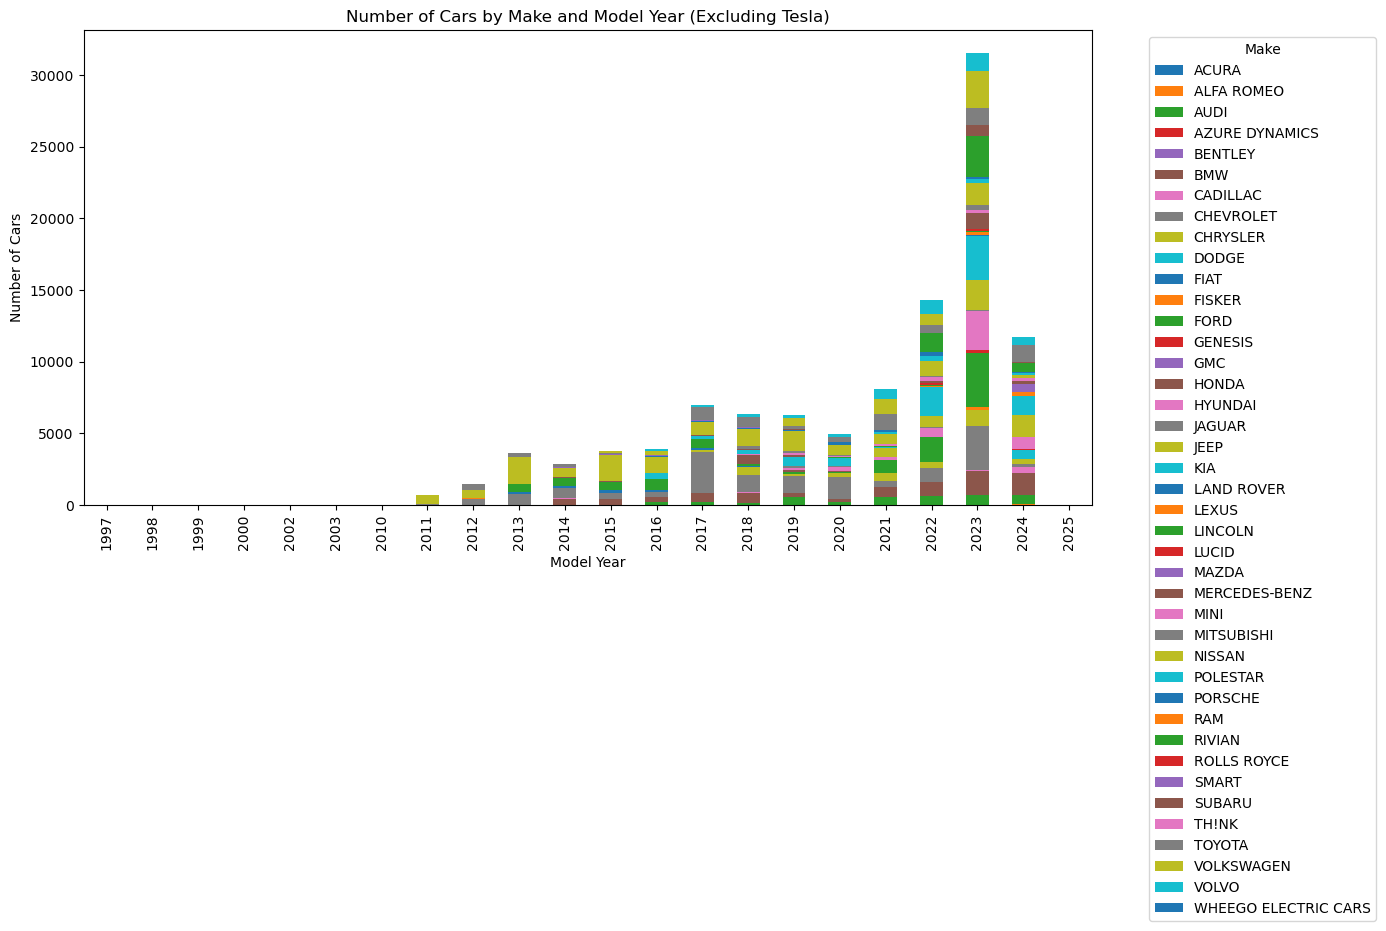

In [29]:
# Step 1: Group by 'Model Year' and 'Make' and count the number of cars
make_model_year_counts = ev_data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Step 2: Remove rows where 'Make' is 'Tesla'
make_model_year_counts = make_model_year_counts.loc[make_model_year_counts['Make'] != 'TESLA']

# Step 3: Pivot the DataFrame to have 'Model Year' as index and 'Make' as columns
make_model_year_pivot = make_model_year_counts.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# Display the pivoted data
print(make_model_year_pivot.head())

# Step 4: Create a stacked bar chart
make_model_year_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of Cars by Make and Model Year (Excluding Tesla)')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

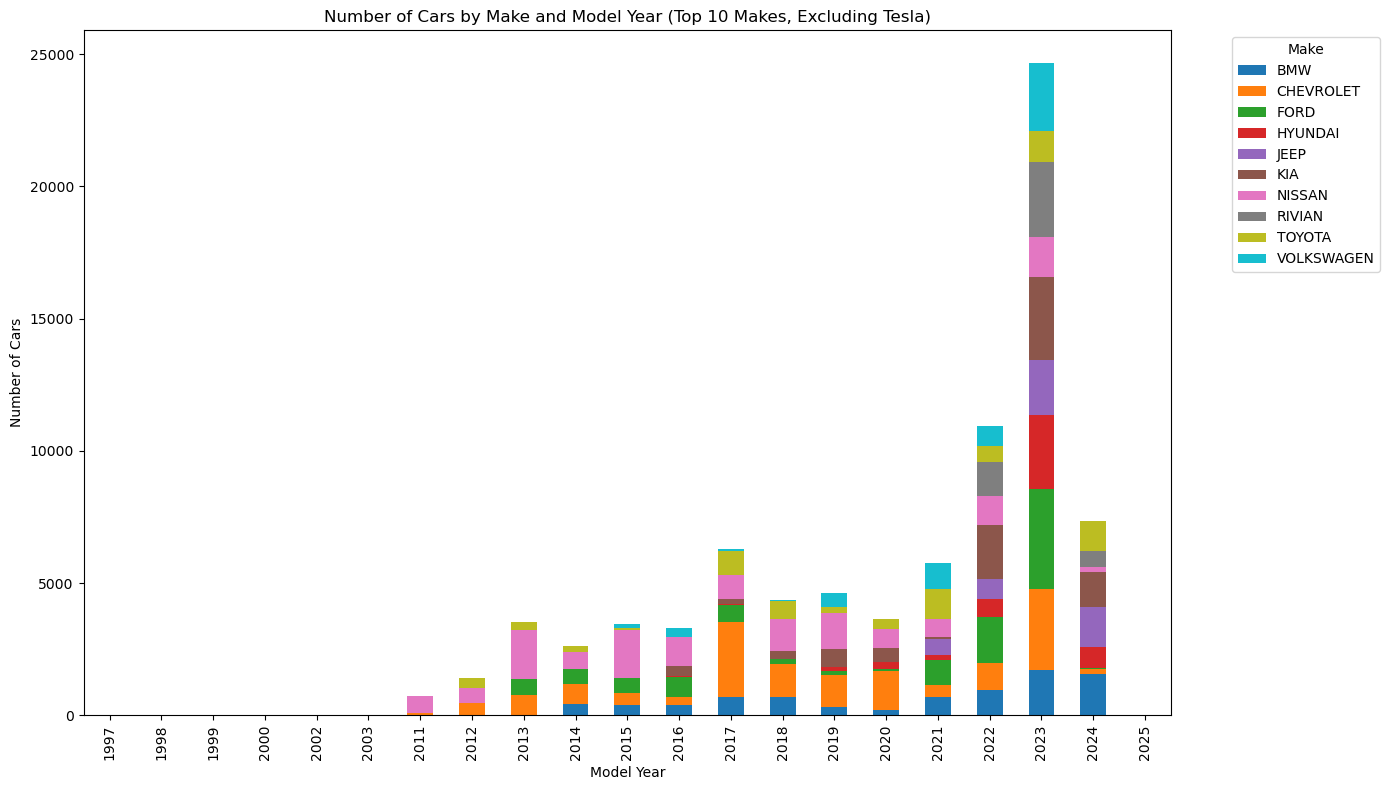

In [33]:
# Step 1: Group by 'Model Year' and 'Make' and count the number of cars
make_model_year_counts = ev_data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Step 2: Remove rows where 'Make' is 'Tesla'
make_model_year_counts = make_model_year_counts.loc[make_model_year_counts['Make'] != 'TESLA']

# Step 3: Calculate the total count by make and identify top 10 makes
total_counts_by_make = make_model_year_counts.groupby('Make')['Count'].sum().reset_index()
top_10_makes = total_counts_by_make.sort_values(by='Count', ascending=False).head(10)['Make']

# Step 4: Filter the original grouped data to include only the top 10 makes
filtered_make_model_year_counts = make_model_year_counts[make_model_year_counts['Make'].isin(top_10_makes)]

# Step 5: Pivot the DataFrame to have 'Model Year' as index and 'Make' as columns
make_model_year_pivot = filtered_make_model_year_counts.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# Step 6: Create a stacked bar chart
make_model_year_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of Cars by Make and Model Year (Top 10 Makes, Excluding Tesla)')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Make        BMW  CHEVROLET  FORD  HYUNDAI  JEEP  KIA  NISSAN  RIVIAN  TOYOTA  \
Model Year                                                                     
1997        0.0        1.0   0.0      0.0   0.0  0.0     0.0     0.0     0.0   
1998        0.0        0.0   1.0      0.0   0.0  0.0     0.0     0.0     0.0   
1999        0.0        0.0   5.0      0.0   0.0  0.0     0.0     0.0     0.0   
2000        0.0        0.0   7.0      0.0   0.0  0.0     0.0     0.0     0.0   
2002        0.0        0.0   0.0      0.0   0.0  0.0     0.0     0.0     2.0   

Make        VOLKSWAGEN  
Model Year              
1997               0.0  
1998               0.0  
1999               0.0  
2000               0.0  
2002               0.0  


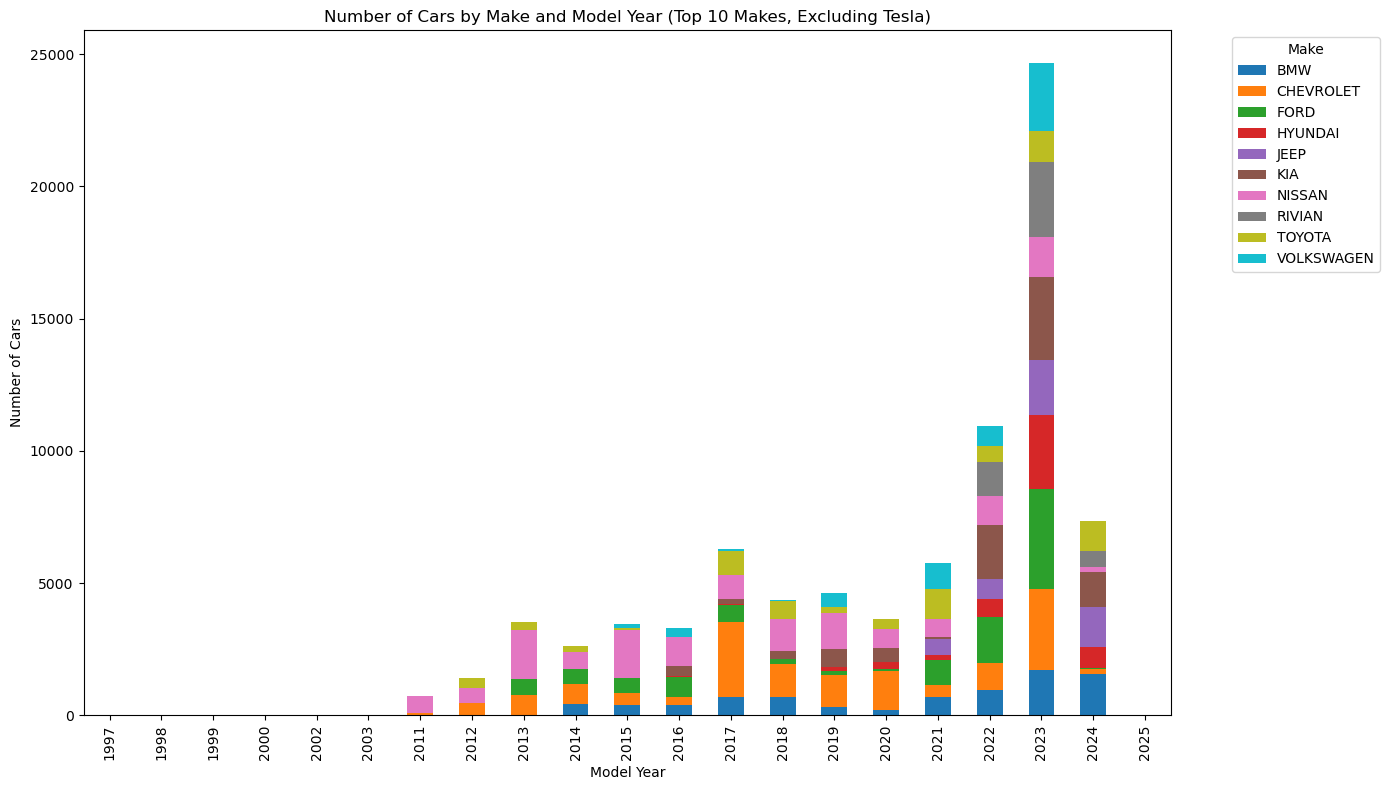

In [36]:
# Step 1: Group by 'Model Year' and 'Make' and count the number of cars
make_model_year_counts = ev_data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Step 2: Remove rows where 'Make' is 'Tesla'
make_model_year_counts = make_model_year_counts.loc[make_model_year_counts['Make'] != 'TESLA']

# Step 3: Calculate the total count by make and identify top 10 makes
total_counts_by_make = make_model_year_counts.groupby('Make')['Count'].sum().reset_index()
top_10_makes = total_counts_by_make.sort_values(by='Count', ascending=False).head(10)['Make']

# Step 4: Filter the original grouped data to include only the top 10 makes
filtered_make_model_year_counts = make_model_year_counts[make_model_year_counts['Make'].isin(top_10_makes)]

# Step 5: Pivot the DataFrame to have 'Model Year' as index and 'Make' as columns
make_model_year_pivot = filtered_make_model_year_counts.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# Step 6: Sort each row of the pivoted DataFrame in descending order
make_model_year_pivot = make_model_year_pivot.apply(lambda row: row.sort_values(ascending=False), axis=1)

# Display the sorted pivoted data
print(make_model_year_pivot.head())

# Step 7: Create a stacked bar chart
make_model_year_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of Cars by Make and Model Year (Top 10 Makes, Excluding Tesla)')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Group car registrations by county and count the number of registrations
county_counts = ev_data.groupby('County').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

county_counts.head(30)

,County,Count
85,King,99076
165,Snohomish,22643
131,Pierce,14932
33,Clark,11335
177,Thurston,6969
87,Kitsap,6303
168,Spokane,5015
188,Whatcom,4602
15,Benton,2351
163,Skagit,2076


In [12]:
# Group car registrations by county and count the number of registrations
county_counts = ev_data.groupby('County').size().reset_index(name='Number of Rows').sort_values(by='Number of Rows', ascending=False)

# Create a new DataFrame
county_counts_df = pd.DataFrame(county_counts)
county_counts_df

,County,Number of Rows
85,King,99076
165,Snohomish,22643
131,Pierce,14932
33,Clark,11335
177,Thurston,6969
...,...,...
73,Hoke,1
135,Placer,1
134,Pitt,1
75,Houston,1


In [13]:
file_path = './CountyIncome.csv'  # Adjust the file path as necessary
county_income_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(county_income_data.head())

      County Household Median Income
0      Adams                  58,384
1   Okanogan                  59,916
2  Wahkiakum                  62,750
3   Garfield                  64,605
4     Yakima                  66,404


In [45]:
# Merge the DataFrames on the "County" column
merged_county_income_df = pd.merge(county_counts_df, county_income_data, on='County', how='left')

# Drop rows where "Household Median Income" is NaN
merged_county_income_df = merged_county_income_df.dropna(subset=['Household Median Income'])

# Function to convert a string with commas to integer safely
def convert_to_integer(value):
    try:
        return int(value.replace(',', ''))
    except ValueError:
        return None  # Handle cases where conversion fails gracefully

# Convert "Number of Rows" and "Household Median Income" to integers
merged_county_income_df['Number of Rows'] = merged_county_income_df['Number of Rows'].astype(int)
merged_county_income_df['Household Median Income'] = merged_county_income_df['Household Median Income'].apply(convert_to_integer)

# Display the merged DataFrame
print(merged_county_income_df)

       County  Number of Rows  Household Median Income
0        King           99076                   132846
1   Snohomish           22643                   110845
2      Pierce           14932                    95645
3       Clark           11335                    94676
4    Thurston            6969                    96210
5      Kitsap            6303                    99462
6     Spokane            5015                    81972
7     Whatcom            4602                    89226
8      Benton            2351                    91247
9      Skagit            2076                    85752
10     Island            2021                    88002
11     Chelan            1147                    76504
12     Yakima            1128                    66404
13    Clallam            1127                    74940
14  Jefferson            1059                    74325
15    Cowlitz             995                    76847
17      Mason             891                    78587
18      Le

Pearson correlation coefficient: 0.7428473900182907
Slope: 0.6541092488063138
Intercept: 77510.85437940354
R-squared: 0.5518222448569863
P-value: 3.219910653705754e-07


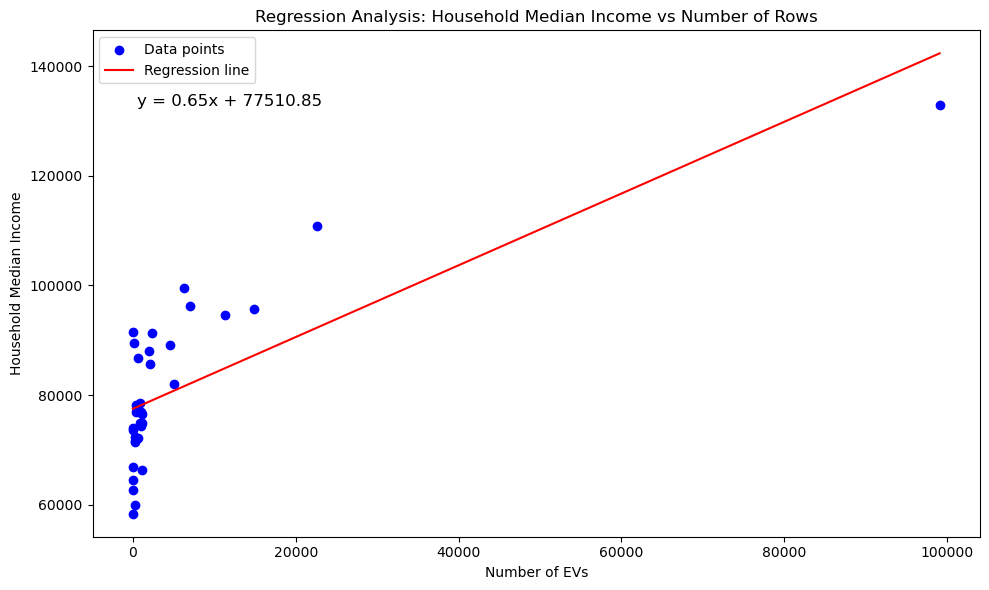

In [95]:
# Drop rows with NaN values, if any
merged_county_income_df = merged_county_income_df.dropna(subset=['Number of Rows', 'Household Median Income'])

# Calculate the correlation coefficient (Pearson correlation)
correlation_coefficient = merged_county_income_df['Number of Rows'].corr(merged_county_income_df['Household Median Income'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")

# Perform a simple linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_county_income_df['Number of Rows'], merged_county_income_df['Household Median Income'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_county_income_df['Number of Rows'], merged_county_income_df['Household Median Income'], color='blue', label='Data points')

# Add regression line
plt.plot(merged_county_income_df['Number of Rows'], intercept + slope * merged_county_income_df['Number of Rows'], color='red', label='Regression line')

# Add equation of the regression line
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='black')

plt.title('Regression Analysis: Household Median Income vs Number of Rows')
plt.xlabel('Number of EVs')
plt.ylabel('Household Median Income')
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
file_path_gas = './Gasoline.csv'  # Adjust the file path as necessary
df = pd.read_csv(file_path_gas)

# Display the first few rows of the DataFrame
print(df.head())

      Date  gasoline_price
0  5/15/03           1.584
1  6/15/03           1.607
2  7/15/03           1.639
3  8/15/03           1.798
4  9/15/03           1.894


In [62]:
# Convert 'date' column to datetime format if needed
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'date' column
df['year'] = df['Date'].dt.year

# Group by 'year' and calculate the average gasoline price
average_gasoline_prices = df.groupby('year')['gasoline_price'].mean()

# Display the result
print(average_gasoline_prices)

year
2003    1.674500
2004    1.986917
2005    2.407000
2006    2.749000
2007    3.009000
2008    3.458500
2009    2.618167
2010    3.055333
2011    3.768000
2012    3.893500
2013    3.691500
2014    3.607667
2015    2.743667
2016    2.532583
2017    2.913917
2018    3.271667
2019    3.184000
2020    2.732333
2021    3.513333
2022    4.657333
2023    4.538083
2024    4.279333
Name: gasoline_price, dtype: float64


/var/folders/0h/qqmkr3rs5s72v4bnyvq7v1xr0000gn/T/ipykernel_65193/4026534508.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


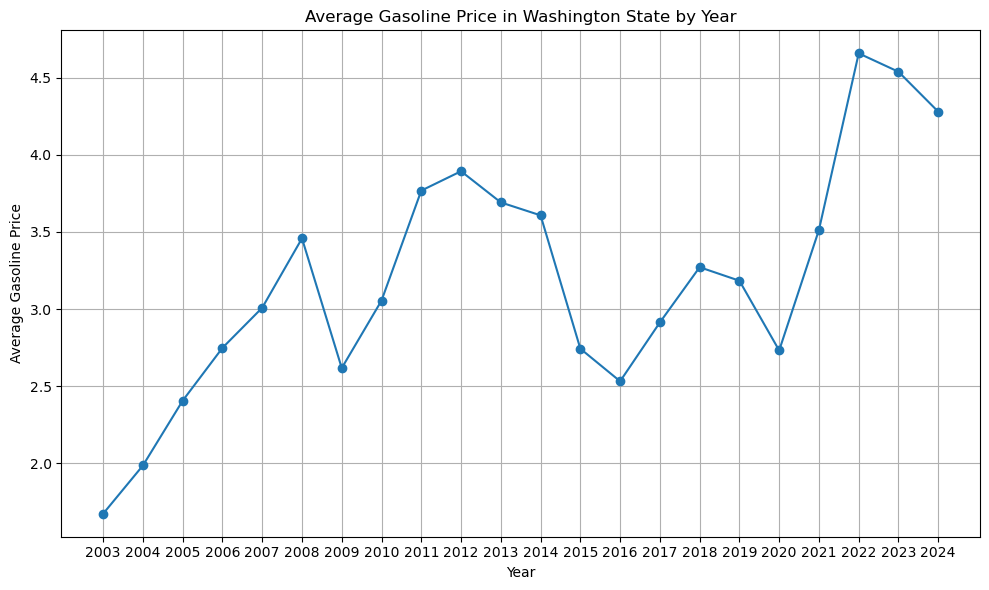

In [65]:
# Reset index to make 'year' a column again (if 'year' was used as index)
average_gasoline_prices = average_gasoline_prices.reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(average_gasoline_prices['year'], average_gasoline_prices['gasoline_price'], marker='o', linestyle='-')

plt.title('Average Gasoline Price in Washington State by Year')
plt.xlabel('Year')
plt.ylabel('Average Gasoline Price')
plt.grid(True)
plt.xticks(average_gasoline_prices['year'])  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()

In [70]:
ev_gas_data = pd.merge(ev_data, average_gasoline_prices, left_on='Model Year', right_on='year', how='left')

# Drop the 'year' column if you don't need it anymore
ev_gas_data.drop('year', axis=1, inplace=True)

# Display the merged DataFrame
print(ev_gas_data.head(5))

   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  5YJSA1E22K       King  Seattle    WA      98112.0        2019   TESLA   
1  3MW39FS05R     Yakima   Zillah    WA      98953.0        2024     BMW   
2  1N4AZ0CP0F       King     Kent    WA      98031.0        2015  NISSAN   
3  5YJSA1H20F  Snohomish  Bothell    WA      98012.0        2015   TESLA   
4  JTMAB3FV1N     Yakima   Yakima    WA      98908.0        2022  TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL S          Battery Electric Vehicle (BEV)   
1        330E  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     MODEL S          Battery Electric Vehicle (BEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  \
0           Clean Alternative Fuel Vehicle Eligible  ...   
1             Not eligible due to low battery range  ...   
2           Clean Al

In [72]:
model_year_counts = ev_data.groupby('Model Year').size().reset_index(name='Number of Rows')
model_year_counts

,Model Year,Number of Rows
0,1997,1
1,1998,1
2,1999,5
3,2000,7
4,2002,2
5,2003,1
6,2008,21
7,2010,24
8,2011,736
9,2012,1595


In [79]:
merged_data = pd.merge(model_year_counts, average_gasoline_prices, left_on='Model Year', right_on='year', how='leftyears_to_delete = [1997, 1998, 1999, 2000, 2001, 2002]

# Iterate through each year and delete rows
for year in years_to_delete:
    merged_data = merged_data[merged_data['Model Year'] != year]

# Display the modified DataFrame after deleting rows
print(merged_data.head())')

# Drop the 'year' column if you don't need it anymore
merged_data.drop('year', axis=1, inplace=True)

# Display the merged DataFrame
print(merged_data.head(40))

    Model Year  Number of Rows  level_0  index  gasoline_price
0         1997               1      NaN    NaN             NaN
1         1998               1      NaN    NaN             NaN
2         1999               5      NaN    NaN             NaN
3         2000               7      NaN    NaN             NaN
4         2002               2      NaN    NaN             NaN
5         2003               1      0.0    0.0        1.674500
6         2008              21      5.0    5.0        3.458500
7         2010              24      7.0    7.0        3.055333
8         2011             736      8.0    8.0        3.768000
9         2012            1595      9.0    9.0        3.893500
10        2013            4363     10.0   10.0        3.691500
11        2014            3533     11.0   11.0        3.607667
12        2015            4818     12.0   12.0        2.743667
13        2016            5528     13.0   13.0        2.532583
14        2017            8650     14.0   14.0        2

In [86]:
years_to_delete = [1997, 1998, 1999, 2000, 2001, 2002,2024,2025]

# Iterate through each year and delete rows
for year in years_to_delete:
    merged_data = merged_data[merged_data['Model Year'] != year]

# Display the modified DataFrame after deleting rows
print(merged_data.head())

   Model Year  Number of Rows  level_0  index  gasoline_price
5        2003               1      0.0    0.0        1.674500
6        2008              21      5.0    5.0        3.458500
7        2010              24      7.0    7.0        3.055333
8        2011             736      8.0    8.0        3.768000
9        2012            1595      9.0    9.0        3.893500


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming merged_data is your DataFrame with 'gasoline_price' and 'Model Year'
# Replace with actual column names if different
X = merged_data[['Model Year']]  # Feature (independent variable)
y = merged_data['gasoline_price']  # Target (dependent variable)


In [88]:
# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict gasoline prices based on the model
y_pred = model.predict(X)

# Calculate R-squared score to evaluate the model
r_squared = r2_score(y, y_pred)
print(f'R-squared: {r_squared}')

# Print coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


R-squared: 0.24824731806941946
Coefficients: [0.0676951]
Intercept: -133.08683909795238


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


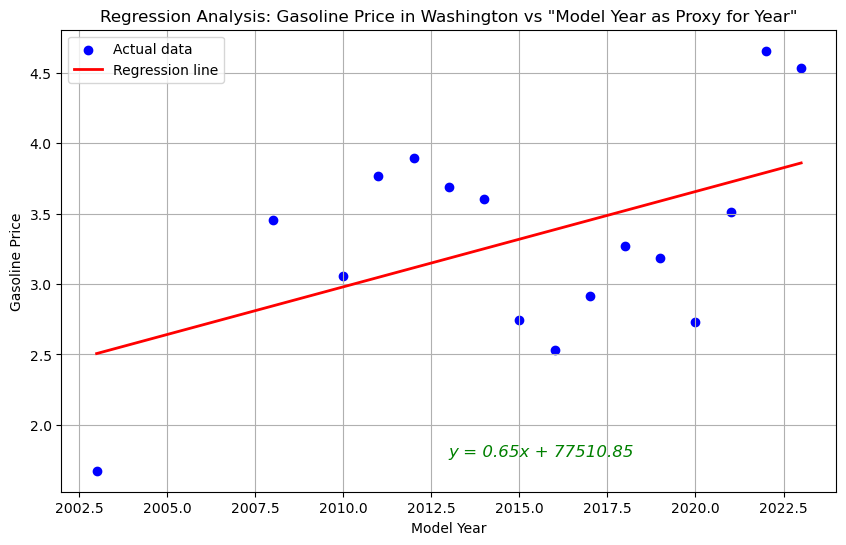

In [94]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

# Adding the equation to the plot
plt.text(X.max() - 10, y.min() + 0.1, equation, fontsize=12, color='green', style='italic')

plt.title('Regression Analysis: Gasoline Price in Washington vs "Model Year as Proxy for Year"')
plt.xlabel('Model Year')
plt.ylabel('Gasoline Price')
plt.legend()
plt.grid(True)
plt.show()


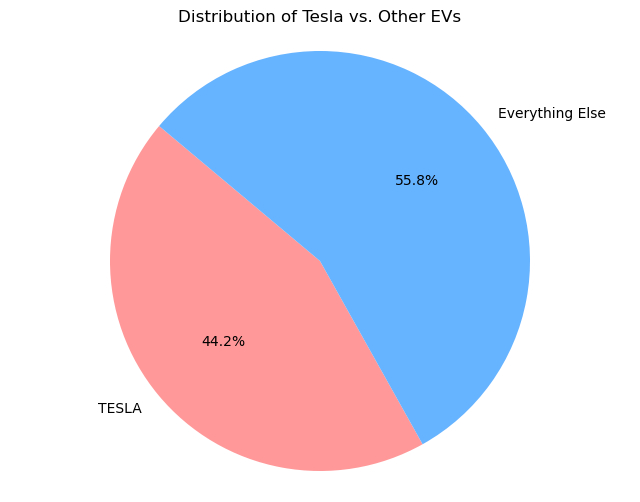

In [98]:
# Count the number of rows for 'TESLA' and 'Everything Else'
make_counts = ev_data['Make'].value_counts()

# Group 'Everything Else' as a single category
make_counts['Everything Else'] = make_counts.drop('TESLA').sum()

# Pie chart labels
labels = ['TESLA', 'Everything Else']

# Pie chart sizes
sizes = [make_counts['TESLA'], make_counts['Everything Else']]

# Pie chart colors
colors = ['#ff9899','#66b3ff']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tesla vs. Other EVs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

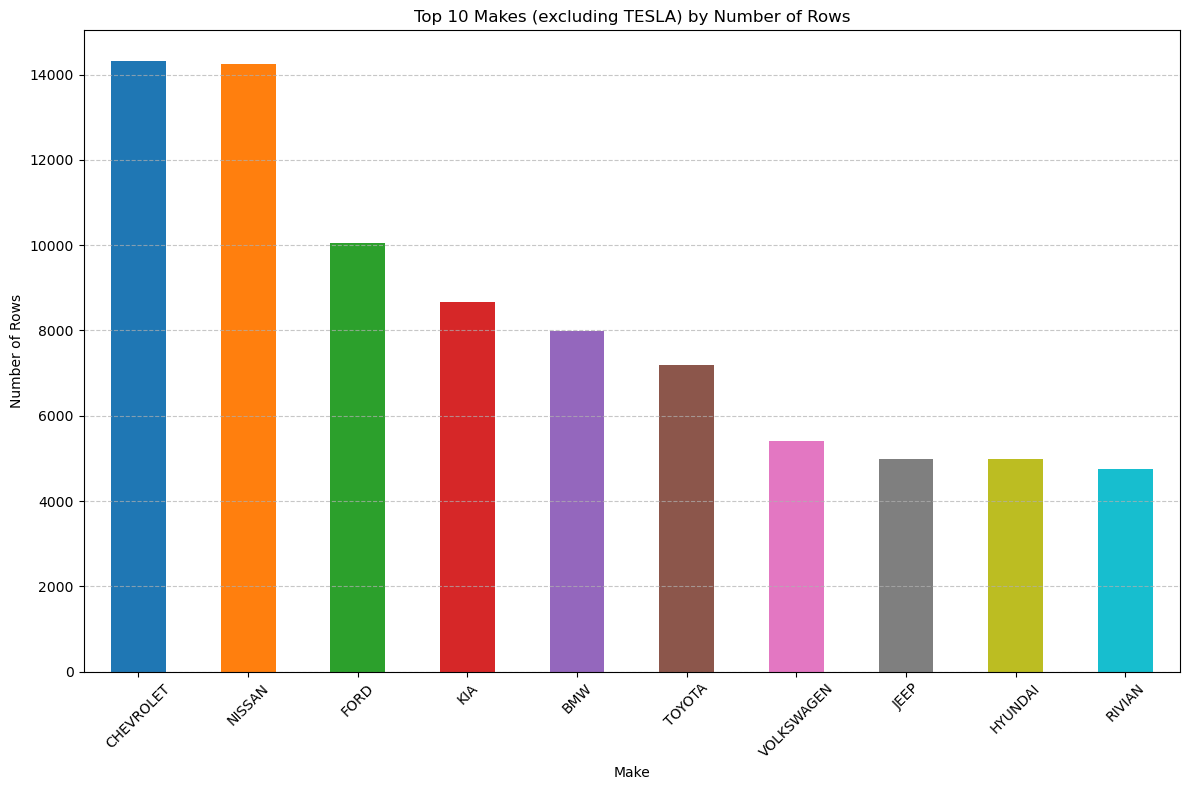

In [101]:
ev_data = pd.read_csv('ev_data.csv')

# Filter out TESLA and count number of rows for each make
make_counts = ev_data[ev_data['Make'] != 'TESLA']['Make'].value_counts().nlargest(10)

# Define colors for each bar (10 different colors)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the bar graph with different colors for each bar
plt.figure(figsize=(12, 8))
make_counts.plot(kind='bar', color=colors)
plt.title('Top 10 Makes (excluding TESLA) by Number of Rows')
plt.xlabel('Make')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()